In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import cufflinks as cf
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os



In [4]:
df = pd.read_csv('/Users/sumitkumar/Downloads/diamonds.csv')
df.head(n=10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


[]

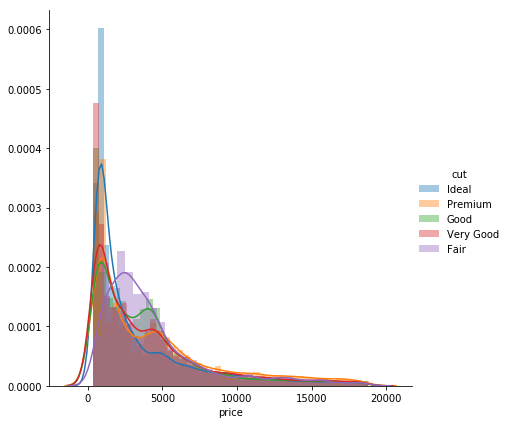

In [5]:
sns.FacetGrid(df, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

In [6]:
cut_dict = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
clarity_dict ={ 'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7 , 'IF' : 8}
color_dict = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}

In [7]:
df['cut'] = df['cut'].map(cut_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)

In [8]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(n=10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


In [9]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [10]:
df = sklearn.utils.shuffle(df, random_state = 42)
X = df.drop(['price'], axis = 1).values
X = preprocessing.scale(X)
y = df['price'].values
y = preprocessing.scale(y)

In [11]:
test_size = 200
X_train = X[: -test_size]
y_train = y[: -test_size]
X_test = X[-test_size :]
y_test =  y[-test_size :]

In [12]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))    

In [13]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(200, 0, 0)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [14]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 4, Max Accuracy = 98.04928158781551


In [15]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.9804928158781552


In [18]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual Price',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted Price',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)


layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized Price')
)
figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)